# Exploring and Analyzing Text Data Assignment 

In [ ]:
%reload_ext nb_black

In [ ]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [ ]:
dataloc = r"/Users/emn/Thinkful Data Science Projects/pairtime/news_articles"

DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(dataloc, DOC_PATTERN)

file_ids = corpus.fileids()
docs = []
for x in file_ids:
    text = corpus.raw(x)
    docs.append(text)
docs[0]

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [ ]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [
        token.lower()
        for token in tokens
        if not token.lower() in stopwords.words("english")
        if not token in string.punctuation
    ]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])

    spacy_doc = nlp(doc)
    remove = ["DATE", "TIME", "PERCENT", "MONEY", "QUANTITY", "ORDINAL", "CARDINAL"]
    entities = [entity.text for entity in spacy_doc.ents if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words

    stats = [
        num_sents,
        num_tokens,
        num_words,
        vocab,
        num_entities,
        words_sent,
        char_word,
        lex_div,
    ]

    return stats

In [ ]:
text_stats(doc)

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [ ]:
results_df = pd.DataFrame(
    columns=[
        "num_sents",
        "num_tokens",
        "num_words",
        "vocab",
        "num_entities",
        "words_sent",
        "char_word",
        "lex_div",
    ]
)

for i, doc in enumerate(docs):
    results_df.loc[i, :] = text_stats(doc)

In [ ]:
results_df = results_df.astype(float)
results_df.info()

### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [ ]:
results_df.describe()

### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [ ]:
cleaned = [
    token.lower()
    for token in word_tokenize(docs[0])
    if token.lower() not in stopwords.words("english")
    if token.isalpha()
]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
fdist_df.columns = ["Term", "Freq"]
ordered = fdist_df.sort_values("Freq", ascending=False)
filtered = ordered[ordered["Freq"] > 1]

plt.figure(figsize=(20, 10))
sns.barplot(data=filtered, x="Freq", y="Term")
plt.title("Term Frequency Dist. \n", fontsize=16)
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [ ]:
def word_cloud(text, colormap="tab10", background_color="white"):
    cloud = WordCloud(
        width=1600,
        height=800,
        stopwords=STOPWORDS,
        colormap=colormap,
        background_color=background_color,
    ).generate(text)
    plt.figure(figsize=(100, 50))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
word_cloud(docs[0])

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [ ]:
# import nltk

# nltk.download("averaged_perceptron_tagger")

In [12]:
import re

<IPython.core.display.Javascript object>

In [13]:
import nltk

nltk.download("words")
nltk.download("maxent_ne_chunker")

[nltk_data] Downloading package words to /Users/emn/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/emn/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

<IPython.core.display.Javascript object>

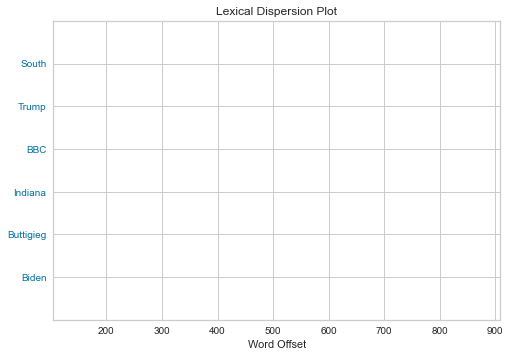

<IPython.core.display.Javascript object>

In [14]:
tagged = pos_tag(word_tokenize(docs[3]))

namedEnt = nltk.ne_chunk(tagged, binary=True)

entities = re.findall(r"NE\s(.*?)/", str(namedEnt))

all_of_them = list(set(entities))

all_of_them = all_of_them[0:6]

Text(word_tokenize(docs[3])).dispersion_plot(all_of_them)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [6]:
from yellowbrick.text.postag import PosTagVisualizer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [7]:
visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token,color)
               for color, token in visualizer.tagged)))
print('\n')


NameError: name 'tagged' is not defined

<IPython.core.display.Javascript object>